# P2 de Numérico

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time

## Interpolação Polinomial
Pela Forma de **Newton**

In [2]:
xi = np.array([0, 0.5, 1, 2])
yi = np.array([0, 1/6, 1/3, 0.25])

In [3]:
fs = np.zeros((xi.shape[0], xi.shape[0]))
fs[0, :] = yi
for i in range(1, xi.shape[0]):
    for j in range(1, xi.shape[0]-i+1):
        print("f[{}][{}] = ({} - {})/({} - {})".format(i, j, fs[i-1][j], fs[i-1][j-1], xi[j], xi[j-1]))
        fs[i][j-1] = (fs[i-1][j] - fs[i-1][j-1])/(xi[j+i-1] - xi[j-1])

f[1][1] = (0.16666666666666666 - 0.0)/(0.5 - 0.0)
f[1][2] = (0.3333333333333333 - 0.16666666666666666)/(1.0 - 0.5)
f[1][3] = (0.25 - 0.3333333333333333)/(2.0 - 1.0)
f[2][1] = (0.3333333333333333 - 0.3333333333333333)/(0.5 - 0.0)
f[2][2] = (-0.08333333333333331 - 0.3333333333333333)/(1.0 - 0.5)
f[3][1] = (-0.27777777777777773 - 0.0)/(0.5 - 0.0)


In [4]:
df = pd.DataFrame(fs.T)
df

,0,1,2,3
0,0.000000,0.333333,0.000000,-0.138889
1,0.166667,0.333333,-0.277778,0.000000
2,0.333333,-0.083333,0.000000,0.000000
3,0.250000,0.000000,0.000000,0.000000


In [5]:
print("o polinômio interpolador é: ")
for i in range(xi.shape[0]-1):
    print("{}x^{} + ".format(fs[i][0], i), end="")
print("{}x^{}".format(fs[xi.shape[0]-1][0], xi.shape[0]-1))


o polinômio interpolador é: 
0.0x^0 + 0.3333333333333333x^1 + 0.0x^2 + -0.13888888888888887x^3


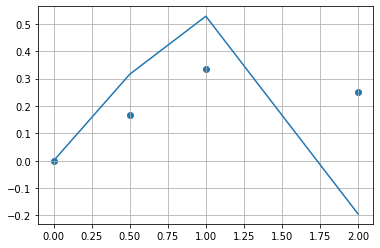

In [6]:
plt.scatter(xi, yi)
plt.plot()
pol = fs[0]
for i in range(1, xi.shape[0]):
    pol += fs[i][0]*(xi**i)
plt.plot(xi, pol)
plt.grid()

## Integração Numérica
Cálculo de integrais definidas $\int_{a}^{b} f(x) dx$

In [7]:
def f(x):
    return np.exp(-x)

### Método dos Trapézios
Aproximação $\int_{x_i}^{x_{i+1}}f(x) dx \approx \frac{f(x_{i+1}) + f(x_{i})}{2}(x_{i+1}-x_{i})$


Erro da forma $\epsilon \leq \frac{|b-a|^{3}}{12n^2}max(f''(z)), z \in [a, b]$

In [8]:
def trap_min(a, b, thresh, max_second_derivative):
    err = 1000000 #infinite
    err_vec = []
    n=0
    init_time = time()
    while (not err <= thresh) or (time() - init_time) >= 10:
        n += 1
        err = ((b-a)**3)/(12*(n**2))*max_second_derivative
        err_vec.append(err)
    plt.plot(err_vec)
    plt.grid()
    return n

In [9]:
def trapezios(a, b, N):
    h = (b-a)/N
    s = 0
    s += f(a)
    s += f(b)
    for i in range(1, N):
        s += 2*f(a + i*h)
    return (s*h)/2

25

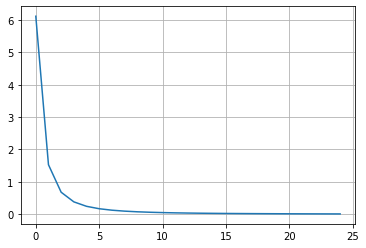

In [10]:
trap_min(0, 3, 0.01, np.e)

In [11]:
trapezios(0, 3, 25)

0.9513529135825631

### Método de Simpson

Aproximação $\int_{x_i}^{x_{i+1}}f(x) dx \approx \int_{x_i}^{x_{i+1}}P_2(x) dx$, onde $P_2(x)$ é o polinômio interpolador de $f(x)$ nos pontos $[a, \frac{a+b}{2}, b]$


Erro da forma $\epsilon \leq \frac{|b-a|^{5}}{2880n^4}max(f^{(4)}(x)), z \in [a, b]$

In [12]:
def simpson(a, b, N):
    h = (b-a)/(2*N)
    s = 0 
    s += f(a)
    s += f(b)
    impar = True
    for i in range(1, 2*N):
        if impar: # not focusing on performance
            s += 4*f(a + i*h)
        else:
            s += 2*f(a + i*h)
        impar = not impar
    return (s*h)/3

In [13]:
simpson(1, 5, 5)

0.361191894359252

#### Método de Simpson a partir dos Trapézios
$S(h) = \frac{4T(h)-T(2h)}{3}$

In [14]:
s = (4*trapezios(0, 1, 2) - trapezios(0, 1, 1))/3
s

0.6323336800036626

In [15]:
s = (4*trapezios(0, 1, 4) - trapezios(0, 1, 2))/3
s

0.6321341753205322

## Equações Diferenciais Ordinárias
Inicialmente de primeira ordem, do tipo $\dot{y} = f(x, t)$

In [16]:
def y_dot(t, y):
    return y

### Método de Euler
Aproximação da função pela poligonal dada pelas retas tangentes

$y_{i+1} = y_i + h f(t_i, y_i)$

O erro é majorado pela expressão $|y(t_i) - y_i| \leq \frac{hM}{2L}|e^{L(t_i-a)}-1|$

In [17]:
def euler(y0, a, b, N):
    ys = np.ndarray((N))
    h = (b-a)/N 
    ys[0] = y0
    for i in range(1, N):
        t=i*h
        ys[i] = ys[i-1] + h*y_dot(t, ys[i-1])
    return ys

In [22]:
solutions = euler(1, 0, 1, 100)

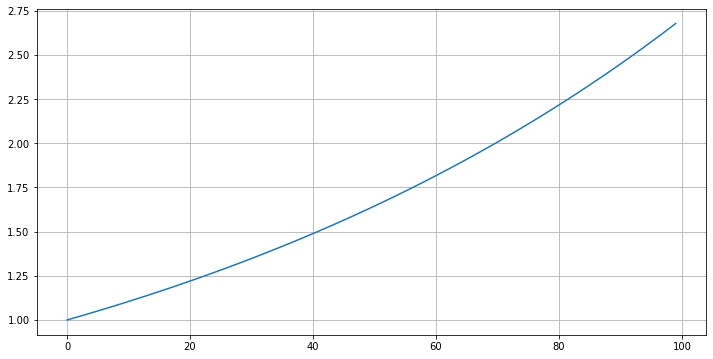

In [26]:
plt.figure(1, (12,6))
plt.grid()
plt.plot(solutions)

### Método de Runge-Kutta de ordem 2
$y_{i+1} = y_i + \frac{h}{2}[f(t_i, y_i) + f(t_{i+1}, \underbrace{y_i + hf(t_i,y_i))}_{y_{i+1} de Euler}]$

O erro apresentado é de ordem $O(n^3)$

In [40]:
def runge_kutte(y0, a, b, N):
    ys = np.ndarray((N))
    h = (b-a)/N 
    ys[0] = y0
    for i in range(1, N):
        t=i*h
        ys[i] = ys[i-1] + (h/2)*(y_dot(t, ys[i-1]) + y_dot((i+1)*h, ys[i-1] + h*y_dot(t, ys[i-1]))) #only working for integers
    return ys

In [41]:
def runge_kutte_from_euler(y0, a, b, n, euler_sol):
    ys = np.ndarray((n))
    h = (b-a)/n 
    ys[0] = y0
    for i in range(1, n):
        t=i*h
        ys[i] = ys[i-1] + (h/2)*(y_dot(t, ys[i-1]) + y_dot((i+1)*h, euler_sol[i])) #only working for integers
    return ys

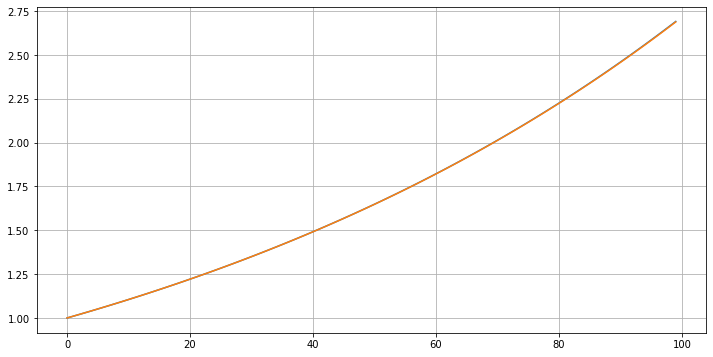

In [42]:
rk_solutions = runge_kutte(1, 0, 1, 100)
rk_fe_solutions = runge_kutte_from_euler(1, 0, 1, 100, solutions)
#they're both the same
plt.figure(1, (12,6))
plt.grid()
#they're both the same
plt.plot(rk_solutions)
plt.plot(rk_fe_solutions)